# Algorithm Design
## Homework No. 01
### Calculating C(n, k) by different algorithms
\begin{equation*}
{n \choose k} = \frac {n!} {k! { (n-k)}!}
\end{equation*}
### Computer Details
* Memory: 16384 RAM
* BIOS: 2.1
* Processor: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz (8 CPUs), ~2.0GHz
* Hard: SSD Drive
* GPU: Intel(R) UHD Graphics 620
* OS: Windows 10 Home 64-bit (10.0, Build 18363)

---

###### Import libraries

In [0]:
import numpy as np                 # Making Array (And some other operations with arrays)
import pandas as pd                # Creating Dataframe
from math import factorial         # Factorial Function
import time                        # Recording Time
import matplotlib.pyplot as plt    # Ploting Tool
import google.colab as gclb        # Working with 'Google Colab'

###### Generate array(1, 50) = 0 named 'n'

In [0]:
n = np.zeros(50)

###### Generate array(1, 50) = 0 named 'k'

In [0]:
k = np.zeros(50)

###### Initializing array 'n' by random value between [100, 1000) and array 'k' by random value between [1, n[i]]

In [0]:
for i in range(50):
    n[i] = int(np.random.randint(100, 1000))
    k[i] = int(np.random.randint(1, n[i] + 1))

###### Make main DataFrame by value 'n' and value 'k' named 'df'

In [0]:
df = pd.DataFrame({'n': n, 'k': k})
df.head()

,n,k
0,874.0,164.0
1,712.0,310.0
2,926.0,586.0
3,239.0,122.0
4,519.0,251.0


---

# 1st Algorithm
### Direct calculation

###### Algorithm defenition

In [0]:
def first_algorithm(n: int, k: int) -> int:
    """Direct calculation of C(n, k)."""
        
    n_factorial = 1
    for i in range(1, int(n + 1)):
        n_factorial *= i
        
    k_factorial = 1    
    for i in range(1, int(k + 1)):
        k_factorial *= i
    
    p = int(n - k)
    p_factorial = 1    
    for i in range(1, int(p + 1)):
        p_factorial *= i
        
    return n_factorial / (k_factorial * p_factorial)

###### Calculating the execution time

In [0]:
# Initializing array(1, 50) by 0 named 'alg1_time' for recordng execution time
alg1_time = np.zeros(50)

# 's1' is variable for sum of exection time for specefic algorithm
s1 = 0

for i in range(50):
    # Start point
    start_time = time.time()
    
    # Running algorithm
    first_algorithm(n[i], k[i])
    
    # End point
    end_time = time.time()
    
    # Running time = End point - Start point
    ex_time = end_time - start_time
    
    # time of running this algorimth for n = i and k = i
    alg1_time[i] = ex_time
    
    # Add running time to s1
    s1 += ex_time
    
print('Total time =', s1)

Total time = 0.011699914932250977


###### Add column for execution time of first algorithm named 'A01_ET' and answer of algorithm for n, k named 'A01_RESULT'

In [0]:
df['A01_ET'] = alg1_time
df.head()

,n,k,A01_ET
0,874.0,164.0,0.000658
1,712.0,310.0,0.000376
2,926.0,586.0,0.000586
3,239.0,122.0,0.000077
4,519.0,251.0,0.000227


###### Visualize the result

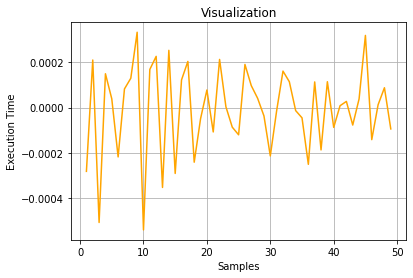

In [0]:
# Label of 'x axix'
plt.xlabel('Samples')

# Label of 'y axix'
plt.ylabel('Execution Time')

# Title of chart
plt.title('Visualization')

# Rate of change (Differential)
df['A01_ET'].diff().plot(color = 'orange');

plt.grid(True)

---

# 2nd Algorithm
### Recursive function

###### Algorithm defenition

In [0]:
def second_algorithm(n: int, k: int) -> int:
    """Recursive calculation for calculating C(n, k)."""
    
    if k == 1:
        return n
    elif k == n:
        return 1
    else:
        return second_algorithm(n - 1, k - 1) + second_algorithm(n - 1, k)

###### Calculating the execution time

In [0]:
# Initializing array(1, 50) by 0 named 'alg2_time' for recordng execution time
alg2_time = np.zeros(50)

# 's2' is variable for sum of exection time for specefic algorithm
s2 = 0

for i in range(50):
    # Start point
    start_time = time.time()
    
    # Running algorithm
    second_algorithm(n[i], k[i])
    
    # End point
    end_time = time.time()
    
    # Running time = End point - Start point
    ex_time = end_time - start_time
    
    # time of running this algorimth for n = i and k = i
    alg2_time[i] = ex_time
    
    # Add running time to s2
    s2 += ex_time
    
print('Total time =', s2)

###### Add column for execution time of first algorithm named 'A02_ET' and answer of algorithm for n, k named 'A02_RESULT'

In [0]:
df['A02_ET'] = alg2_time
df.head()

NameError: ignored

###### Visualize the result

In [0]:
# Label of 'x axix'
plt.xlabel('Samples')

# Label of 'y axix'
plt.ylabel('Execution Time')

# Title of chart
plt.title('Visualization')

# Rate of change (Differential)
df['A02_ET'].diff().plot(color = 'red');

plt.grid(True)

---

# 3rd Algorithm
### Memoization function

In [0]:
# Define variable for saving calculated C(n, k) named 'mem' (abb. Memoize) with value -1
mem = np.zeros((1000, 1000)) -1

###### Algorithm defenition

In [0]:
def third_algorithm(n: int, k: int) -> int:
    """Calculating C(n, k) with Memoization - Means save calculated C(n, k) somewhere."""

    if mem[int(n), int(k)] == -1:
        if k == 1:
            mem[int(n), int(k)] = n
        elif k == n:
            mem[int(n), int(k)] = 1
        else:
            mem[int(n), int(k)] = third_algorithm(int(n - 1), int(k - 1)) + third_algorithm(int(n - 1), int(k))
    return mem[int(n), int(k)]

###### Calculating the execution time

In [0]:
# Initializing array(1, 50) by 0 named 'alg3_time' for recordng execution time
alg3_time = np.zeros(50)

# 's3' is variable for sum of exection time for specefic algorithm
s3 = 0

for i in range(50):
    # Start point
    start_time = time.time()
    
    # Running algorithm
    third_algorithm(n[i], k[i])
    
    # End point
    end_time = time.time()
    
    # Running time = End point - Start point
    ex_time = end_time - start_time
    
    # time of running this algorimth for n = i and k = i
    alg3_time[i] = ex_time
    
    # Add running time to s3
    s3 += ex_time
    
print('Total time =', s3)

Total time = 1.0681514739990234


###### Add column for execution time of first algorithm named 'A03_ET' and answer of algorithm for n, k named 'A03_RESULT'

In [0]:
df['A03_ET'] = alg3_time
df.head()

,n,k,A01_ET,A03_ET
0,833.0,191.0,0.000330,0.409018
1,485.0,479.0,0.000157,0.005614
2,395.0,195.0,0.000086,0.002541
3,101.0,88.0,0.000016,0.000003
4,751.0,591.0,0.000244,0.197149


###### Visualize the result

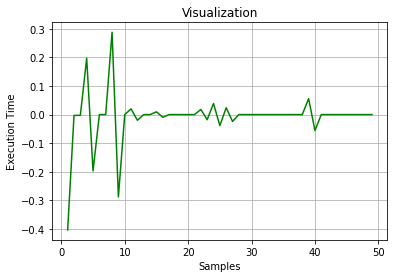

In [0]:
# Label of 'x axix'
plt.xlabel('Samples')

# Label of 'y axix'
plt.ylabel('Execution Time')

# Title of chart
plt.title('Visualization')

# Rate of change (Differential)
df['A03_ET'].diff().plot(color = 'green');

plt.grid(True)

---

# 4th Algorithm
### Dynamic programming

###### Algorithm defenition

In [0]:
def forth_algorithm(n: int, k: int) -> int:
    """Calculating C(n, k) with Dynamic programming's algorithm"""
    
    # Define variable for saving calculated C(n, k) named 'result'
    result = np.zeros((1000, 1000)) - 1
    
    for i in range(0, int(n + 1)):
        for j in range(0, min(int(i + 1), int(k + 1))):
            if j == i or j == 0:
                result[int(i), int(j)] = 1
            else:
                result[int(i), int(j)] = result[int(i - 1), int(j - 1)] + result[int(i - 1), int(j)]
    return result[int(n), int(k)]

###### Calculating the execution time

In [0]:
# Initializing array(1, 50) by 0 named 'alg4_time' for recordng execution time
alg4_time = np.zeros(50)

# 's4' is variable for sum of exection time for specefic algorithm
s4 = 0

for i in range(50):
    # Start point
    start_time = time.time()
    
    # Running algorithm
    forth_algorithm(n[i], k[i])
    
    # End point
    end_time = time.time()
    
    # Running time = End point - Start point
    ex_time = end_time - start_time
    
    # time of running this algorimth for n = i and k = i
    alg4_time[i] = ex_time
    
    # Add running time to s3
    s4 += ex_time
    
print('Total time =', s4)

Total time = 10.001170873641968


###### Add column for execution time of first algorithm named 'A04ET' and answer of algorithm for n, k named 'A04RESULT'

In [0]:
df['A04_ET'] = alg4_time
df.head()

,n,k,A01_ET,A04_ET
0,874.0,164.0,0.000658,0.195060
1,712.0,310.0,0.000376,0.244474
2,926.0,586.0,0.000586,0.526236
3,239.0,122.0,0.000077,0.032237
4,519.0,251.0,0.000227,0.156106


###### Visualize the result

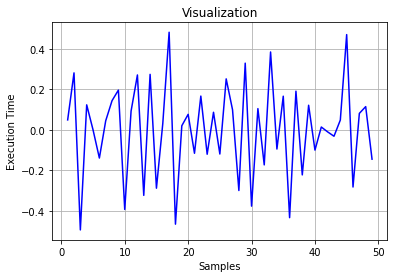

In [0]:
# Label of 'x axix'
plt.xlabel('Samples')

# Label of 'y axix'
plt.ylabel('Execution Time')

# Title of chart
plt.title('Visualization')

# Rate of change (Differential)
df['A04_ET'].diff().plot(color = 'blue');

plt.grid(True)

---

### Save output with .csv format named 'FILE'

In [0]:
gclb.drive.mount('drive')
df.to_csv('drive/My Drive/FILE.csv', index = False);
gclb.files.download('drive/My Drive/FILE.csv')

---

### Compare results with ploting

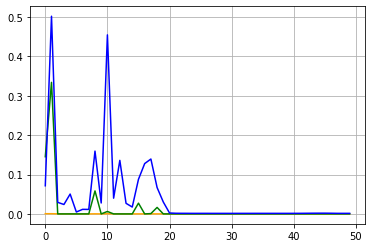

In [0]:
df['A01_ET'].plot(color = 'orange')
# df['A02_ET'].plot(color = 'red')
df['A03_ET'].plot(color = 'green')
df['A04_ET'].plot(color = 'blue');

plt.grid(True)

<br>
<div id="sec_intro" style="direction:rtl;line-height:250%">
	<font face="IRANSANS" size=2.5>
		<font color=#ff6f00 size=5 style="font-weight:bold">
             گزارش کار
        </font>
		<p></p>
		<hr>
در این تمرین، سرعت الگوریتم های مختلف برای محاسبه ترکیب یک شی از شی دیگر بررسی 
و محاسبه شد و نکات و ارزیابی بنده به شرح زیر است
<br>
باید دانست کارایی الگوریتم برای مقادیر بزرگتر، بهتر مشخص میشود (داده هایی که الگوریتم ها، زمان بیشتری برای اجرا آنها طول میکشند، باعث میشوند کارایی یک 
الگوریتم با وضوح بیشتری نمایان شود)
<br>
تست 4 الگوریتم فوق بر روی 50 داده تصادفی در بازه 1 تا 1000 صورت گرفته است (محاسبه فاکتوریل برای اعدادی که در بازه ی بین 1000 تا 10000 باشند ممکن است دچار خطا سرریز شود)
<br>
توجه به این نکته خالی از لطف نیست که زمان اجرای یک الگوریتم خاص بر روی تمامی 50 داده در انتهای هر الگوریتم محاسبه و چاپ میشود
<br>
در انتهای هر الگوریتم، نموداری رسم شده که بیانگر نرخ تغییرات محاسبه ی الگوریتم معین برروی یک داده نسبت به داده های دیگر است
<br>
الگوریتم دوم بنا بر طولانی شدن زمان اجرا (بیش از 5 ساعت)، توسط بنده متوقف شد (صحت درسی الگوریتم را با استفاده از داده های کوچک بررسی کردم) برای داده های کوچک، این الگوریتم حدود 13 برابر دیرتر از الگوریتم پویا اجرا شد و به پایان رسید
<br>
در انتها نیز، زمان اجرای تمامی الگوریتم ها را بصورت نمودار در کنار یکدیگر آورده ام تا به وضوح نتیجه ی اجرای الگوریتم ها برروی داده های یکسان مشخص شود
<br>
برای جزئیات زمان اجرا، کافیست تمامی خطوط را اجرا کرده، سپس فایلی که بطور خودکار دانلود شده را مورد بررسی قرار دهید
</font>
</div>